In [121]:
import pandas as pd
import numpy as np
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  500
Current maximum number of columns:  500
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [124]:
# Load all datasets
combined_data_2024 = pd.read_csv('FBRef Data/2024/Filtered_Combined_Data_2024.csv')
combined_data_2023 = pd.read_csv('FBRef Data/2023/Filtered_Combined_Data_2023.csv')
combined_data_2022 = pd.read_csv('FBRef Data/2022/Filtered_Combined_Data_2022.csv')
combined_data_2024.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,MP,Starts,Min,Dribblers_Tackle_W%,Tackles_per90,Tackles_Won_per90,Tackles_Def_3rd_per90,Tackles_Mid_3rd_per90,Tackles_Att_3rd_per90,Dribblers_Tackled_per90,Dribblers_Challenged_per90,Dribblers_Tackle_Lost_per90,Blocks_per90,Shots_Blocked_per90,Passes_Blocked_Def_per90,Interceptions_per90,Tackles+Interceptions_per90,Clearances_per90,Errors_Shots_per90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per90,Pass_Dead_Shot_per90,Take_Ons_Shot_per90,Shot-Shot_per90,Fouls_drawn_Shot_per90,Defensive_Shot_per90,Pass_Live_Goal_per90,Pass_Dead_Goal_per90,Take_Ons_Goal_per90,Shot_Goal_per90,Fouls_Drawn_Goal_per90,Defensive_Goal_per90,Passes_Total_Cmp%,Passes_Short_Cmp%,Passes_Medium_Cmp%,Passes_Long_Cmp%,Passes_Total_Cmp_per90,Passes_Total_Att_per90,Passes_TotDist_per90,Passes_PrgDist_per90,Passes_Short_Cmp_per90,Passes_Short_Att_per90,Passes_Medium_Cmp_per90,Passes_Medium_Att_per90,Passes_Long_Cmp_per90,Passes_Long_Att_per90,Assists_per90,xAG_per90_x,xA_per90,A-xAG_per90,Key_Passes_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,Progressive_Passes_per90,Passes_Attempted_per90,Live_Ball_Passes_per90,Dead_Ball_Passes_per90,Free_Kick_Passes_per90,Through_Balls_per90,Switches_per90,Crosses_per90,Throw_Ins_Taken_per90,Corner_Kicks_per90,In_Corner_Kicks_per90,Out_Corner_Kicks_per90,Str_Corner_Kicks_per90,Passes_Cmp_per90,Passes_Offside_per90,Passes_Blocked_Off_per90,PK,PK_Attempted,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90_y,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Yellow_per90,Red_per90,Prg_Carries_per90,Prg_Passes_per90,Prg_Passes_Received_per90,Take_Ons_Succ%,Tackled_Take_Ons%,Touches_per90,Touches_Def_Pen_per90,Touches_Def_3rd_per90,Touches_Mid_3rd_per90,Touches_Att_3rd_per90,Touches_Att_Pen_per90,Tocuhes_Live_Balls_per90,Take_Ons_Attempted_per90,Take_Ons_Succ_per90,Tackled_Take_Ons_per90,Carries_per90,Total_Distance_per90,Progressive_Distance_Carried_per90,Progressive_Carries_per90,1/3_Carries_per90,Carries_Penalty_Area_per90,Miscontrols_per90,Dispossessed_per90,Passes_Received_per90,Progressive_Passes_Received_per90,Shots_on_target_%,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Average_shot_distance,Shots_free_kicks,Pens_Scored,Pens_Attempted,XG,Npxg,Npxg_per_shot,Xg_net,Npxg_net,Main_Pos,Secondary_Pos,Total_90s
0,0,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,eng Premier League,25.0,1997.0,19.8,22,20,1780,73.1,2.12,1.26,0.91,1.01,0.20,0.96,1.31,0.35,1.52,0.76,0.76,2.07,4.19,3.43,0.05,1.31,0.15,1.21,0.05,0.00,0.00,0.05,0.00,0.15,0.0,0.0,0.00,0.0,0.0,83.5,89.5,85.3,50.0,41.57,49.80,546.67,178.74,27.07,30.25,12.27,14.39,0.96,1.92,0.10,0.08,0.07,0.03,0.61,2.58,0.81,0.15,3.89,49.80,42.37,7.32,0.35,0.00,0.05,0.71,6.97,0.00,0.00,0.00,0.0,41.57,0.10,1.36,0.0,0.0,0.00,0.10,0.00,0.10,0.01,0.08,0.08,0.01,0.08,0.20,0.00,1.52,3.89,2.73,53.1,28.1,61.87,4.29,21.41,27.17,14.04,1.21,61.87,1.62,0.86,0.45,30.00,146.92,72.17,1.52,1.36,0.20,1.06,0.45,34.90,2.73,33.3,0.15,0.05,0.00,0.00,20.2,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,DF,NaN,19.8
1,1,Aarón Martín,es ESP,DF,Genoa,it Serie A,26.0,1997.0,15.3,22,17,1376,40.9,1.37,0.65,0.46,0.65,0.26,0.59,1.44,0.85,0.78,0.26,0.52,0.59,1.96,0.98,0.00,2.16,0.13,1.31,0.78,0.07,0.00,0.00,0.00,0.13,0.0,0.0,0.00,0.0,0.0,69.6,90.3,74.4,42.2,28.17,40.46,506.41,178.24,12.75,14.12,11.05,14.84,3.53,8.37,0.07,0.11,0.11,-0.05,1.70,1.70,1.05,0.72,2.29,40.46,32.35,7.78,1.05,0.00,0.13,6.93,4.64,2.09,0.46,1.37,0.0,28.17,0.33,1.44,0.0,0.0,0.00,0.07,0.00,0.07,0.01,0.11,0.12,0.01,0.12,0.26,0.07,1.83,2.29,4.71,50.0,50.0,45.95,1.70,10.85,18.82,16.67,0.65,45.95,0.78,0.39,0.39,23.99,120.20,63.53,1.83,1.37,0.20,0.78,0.26,28.24,4.71,0.0,0.33,0.00,0.00,0.00,24.8,2.0,0,0,0.2,0.2,0.03,-0.2,-0.2,DF,NaN,15.3
2,2,Abdoulaye Doucouré,ml MLI,"FW,MF",Everton,eng Premier League,30.0,1993.0,29.2,32,32,2629,39.1,1.47,0.92,0.68,0.48,0.31,0.62,1.58,0.96,0.79,0.10,0.68,0.51,1.99,0.65,0.00,2.29,0.17,2.02,0.00,0.00,

In [125]:
for col in combined_data_2024.columns:
    print(col)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
90s
MP
Starts
Min
Dribblers_Tackle_W%
Tackles_per90
Tackles_Won_per90
Tackles_Def_3rd_per90
Tackles_Mid_3rd_per90
Tackles_Att_3rd_per90
Dribblers_Tackled_per90
Dribblers_Challenged_per90
Dribblers_Tackle_Lost_per90
Blocks_per90
Shots_Blocked_per90
Passes_Blocked_Def_per90
Interceptions_per90
Tackles+Interceptions_per90
Clearances_per90
Errors_Shots_per90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per90
Pass_Dead_Shot_per90
Take_Ons_Shot_per90
Shot-Shot_per90
Fouls_drawn_Shot_per90
Defensive_Shot_per90
Pass_Live_Goal_per90
Pass_Dead_Goal_per90
Take_Ons_Goal_per90
Shot_Goal_per90
Fouls_Drawn_Goal_per90
Defensive_Goal_per90
Passes_Total_Cmp%
Passes_Short_Cmp%
Passes_Medium_Cmp%
Passes_Long_Cmp%
Passes_Total_Cmp_per90
Passes_Total_Att_per90
Passes_TotDist_per90
Passes_PrgDist_per90
Passes_Short_Cmp_per90
Passes_Short_Att_per90
Passes_Medium_Cmp_per90
Passes_Medium_Att_per90
Passes_Long_Cmp_per90
Passes_Long_Att_per90
A

In [126]:
combined_data_2024.dtypes

,0
Unnamed: 0,int64
Player,object
Nation,object
Pos,object
Squad,object
Comp,object
Age,float64
Born,float64
90s,float64
MP,int64


# Passing and Creativity
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per90
Pass_Dead_Shot_per90
Take_Ons_Shot_per90
Shot-Shot_per90
Fouls_drawn_Shot_per90
Defensive_Shot_per90
Pass_Live_Goal_per90
Pass_Dead_Goal_per90
Take_Ons_Goal_per90
Shot_Goal_per90
Fouls_Drawn_Goal_per90
Defensive_Goal_per90
Passes_Total_Cmp%
Passes_Short_Cmp%
Passes_Medium_Cmp%
Passes_Long_Cmp%
Passes_Total_Cmp_per90
Passes_Total_Att_per90
Passes_TotDist_per90
Passes_PrgDist_per90
Passes_Short_Cmp_per90
Passes_Short_Att_per90
Passes_Medium_Cmp_per90
Passes_Medium_Att_per90
Passes_Long_Cmp_per90
Passes_Long_Att_per90
Assists_per90
xAG_per90_x
xA_per90
A-xAG_per90
Key_Passes_per90
Passes_1/3_per90
Passes_Penalty_Area_per90
Crosses_Penalty_Area_per90
Progressive_Passes_per90
Passes_Attempted_per90
Live_Ball_Passes_per90
Dead_Ball_Passes_per90
Free_Kick_Passes_per90
Through_Balls_per90
Switches_per90
Crosses_per90
Throw_Ins_Taken_per90
Corner_Kicks_per90
In_Corner_Kicks_per90
Out_Corner_Kicks_per90
Str_Corner_Kicks_per90
Passes_Cmp_per90
Passes_Offside_per90
Passes_Blocked_Off_per90
Prg_Passes_per90

# Defense
Dribblers_Tackle_W%
Tackles_per90
Tackles_Won_per90
Tackles_Def_3rd_per90
Tackles_Mid_3rd_per90
Tackles_Att_3rd_per90
Dribblers_Tackled_per90
Dribblers_Challenged_per90
Dribblers_Tackle_Lost_per90
Blocks_per90
Shots_Blocked_per90
Passes_Blocked_Def_per90
Interceptions_per90
Tackles+Interceptions_per90
Clearances_per90
Errors_Shots_per90
Defensive_Shot_per90
Defensive_Goal_per90
Yellow_per90
Red_per90


# Possession and Dribbling
Prg_Carries_per90
Prg_Passes_Received_per90
Take_Ons_Succ%
Tackled_Take_Ons%
Touches_per90
Touches_Def_Pen_per90
Touches_Def_3rd_per90
Touches_Mid_3rd_per90
Touches_Att_3rd_per90
Touches_Att_Pen_per90
Tocuhes_Live_Balls_per90
Take_Ons_Attempted_per90
Take_Ons_Succ_per90
Tackled_Take_Ons_per90
Carries_per90
Total_Distance_per90
Progressive_Distance_Carried_per90
Progressive_Carries_per90
1/3_Carries_per90
Carries_Penalty_Area_per90
Miscontrols_per90
Dispossessed_per90
Passes_Received_per90
Progressive_Passes_Received_per90


# Shooting and Finishing

Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xAG_per90_y
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Shots_on_target_%
Shots_total_per90
Shots_on_target_per90
Goals_per_shot
Goals_per_shot_on_target
Average_shot_distance
Shots_free_kicks
Pens_Scored
Pens_Attempted
Npxg_per_shot
Xg_net
Npxg_net

In [127]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the relevant feature lists and their weights
passing_and_creativity_stats =  {
    'Shot_Creating_Action_per90': 0.6, 'Goal_Creating_Action_90': 1, 'Pass_Live_Shot_per90': 0.5,
    'Pass_Dead_Shot_per90': 0.5, 'Take_Ons_Shot_per90': 0.5, 'Shot-Shot_per90': 0.5,
    'Fouls_drawn_Shot_per90': 0.5, 'Defensive_Shot_per90': 0.5, 'Pass_Live_Goal_per90': 1,
    'Pass_Dead_Goal_per90': 0.8, 'Take_Ons_Goal_per90': 0.8, 'Shot_Goal_per90': 0.8,
    'Fouls_Drawn_Goal_per90': 0.7, 'Defensive_Goal_per90': 0.7, 'Passes_Total_Cmp_per90': 0.3,
    'Passes_Total_Att_per90': 0.3, 'Passes_TotDist_per90': 0.4, 'Passes_PrgDist_per90': 0.4,
    'Passes_Short_Cmp_per90': 0.4, 'Passes_Short_Att_per90': 0.4, 'Passes_Medium_Cmp_per90': 0.4,
    'Passes_Medium_Att_per90': 0.4, 'Passes_Long_Cmp_per90': 0.4, 'Passes_Long_Att_per90': 0.4,
    'Assists_per90': 1, 'xAG_per90_x': 0.8, 'xA_per90': 0.9, 'A-xAG_per90': 0.8, 'Key_Passes_per90': 0.7,
    'Passes_1/3_per90': 0.7, 'Passes_Penalty_Area_per90': 0.7, 'Crosses_Penalty_Area_per90': 0.6,
    'Progressive_Passes_per90': 0.6, 'Passes_Offside_per90': -0.1, 'Passes_Blocked_Off_per90': -0.5
}

defense_stats = {
    'Dribblers_Tackle_W%': 0.7, 'Tackles_per90': 0.5, 'Tackles_Won_per90': 0.7, 'Tackles_Def_3rd_per90': 0.5,
    'Tackles_Mid_3rd_per90': 0.5, 'Tackles_Att_3rd_per90': 0.5, 'Dribblers_Tackled_per90': 0.5,
    'Dribblers_Challenged_per90': 0.3, 'Blocks_per90': 0.7, 'Shots_Blocked_per90': 0.7,
    'Passes_Blocked_Def_per90': 0.7, 'Interceptions_per90': 0.7, 'Tackles+Interceptions_per90': 0.7,
    'Clearances_per90': 0.7, 'Errors_Shots_per90': -0.5, 'Defensive_Shot_per90': 0.8, 'Defensive_Goal_per90': 1,
    'Yellow_per90': -0.5, 'Red_per90': -1
}

possession_and_dribbling_stats = {
    'Take_Ons_Succ%': 0.7, 'Tackled_Take_Ons%': 0.7,
    'Touches_per90': 0.3, 'Touches_Def_Pen_per90': 0.3, 'Touches_Def_3rd_per90': 0.3, 'Touches_Mid_3rd_per90': 0.3,
    'Touches_Att_3rd_per90': 0.3, 'Touches_Att_Pen_per90': 0.3, 'Tocuhes_Live_Balls_per90': 0.3,
    'Take_Ons_Attempted_per90': 0.5, 'Take_Ons_Succ_per90': 0.7, 'Tackled_Take_Ons_per90': 0.5, 'Carries_per90': 0.6,
    'Total_Distance_per90': 0.6, 'Progressive_Distance_Carried_per90': 0.7, 'Progressive_Carries_per90': 0.7,
    '1/3_Carries_per90': 0.7, 'Carries_Penalty_Area_per90': 0.8, 'Miscontrols_per90': -0.5, 'Dispossessed_per90': -0.5,
    'Passes_Received_per90': 0.5, 'Progressive_Passes_Received_per90': 0.7
}

shooting_and_finishing_stats = {
    'Goals_per90': 0.9, 'G+A_per90': 0.9, 'G-PK_per90': 1, 'G+A-PK_per90': 1, 'xG_per90': 0.7, 'xAG_per90_y': 0.7,
    'xG+xAG_per90': 0.7, 'npxG_per90': 0.8, 'npxG+xAG_per90': 0.8, 'Shots_on_target_%': 0.5, 'Shots_total_per90': 0.3,
    'Shots_on_target_per90': 0.5, 'Goals_per_shot': 0.8, 'Goals_per_shot_on_target': 0.8, 'Average_shot_distance': 0.5,
    'Shots_free_kicks': 0.5, 'Pens_Scored': 1, 'Pens_Attempted': 0.5, 'Npxg_per_shot': 0.7, 'Xg_net': 0.8, 'Npxg_net': 0.9
}

data_2024=combined_data_2024.copy()

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to fill NaN values with 0 for numerical columns and None for others
def fill_na_values(data):
    numeric_cols = data.select_dtypes(include=[float, int]).columns
    non_numeric_cols = data.select_dtypes(exclude=[float, int]).columns
    data[numeric_cols] = data[numeric_cols].fillna(0)
    data[non_numeric_cols] = data[non_numeric_cols].fillna('None')
    return data

# Function to calculate weighted scores
def calculate_weighted_scores(data, feature_weights):
    weighted_scores = pd.Series(np.zeros(data.shape[0]), index=data.index)
    for feature, weight in feature_weights.items():
        if feature in data.columns:
            weighted_scores += data[feature] * weight
    return weighted_scores

# Create a copy of the data
data_2024 = combined_data_2024.copy()
data_2023 = combined_data_2023.copy()
data_2022 = combined_data_2022.copy()

# Fill NaN values for all datasets
data_2024 = fill_na_values(data_2024)
data_2023 = fill_na_values(data_2023)
data_2022 = fill_na_values(data_2022)


# Calculate weighted scores for each aspect
data_2024['Passing_and_Creativity_Score'] = calculate_weighted_scores(data_2024, passing_and_creativity_stats)
data_2024['Defense_Score'] = calculate_weighted_scores(data_2024, defense_stats)
data_2024['Possession_and_Dribbling_Score'] = calculate_weighted_scores(data_2024, possession_and_dribbling_stats)
data_2024['Shooting_and_Finishing_Score'] = calculate_weighted_scores(data_2024, shooting_and_finishing_stats)

# Calculate weighted scores for each aspect
data_2023['Passing_and_Creativity_Score'] = calculate_weighted_scores(data_2023, passing_and_creativity_stats)
data_2023['Defense_Score'] = calculate_weighted_scores(data_2023, defense_stats)
data_2023['Possession_and_Dribbling_Score'] = calculate_weighted_scores(data_2023, possession_and_dribbling_stats)
data_2023['Shooting_and_Finishing_Score'] = calculate_weighted_scores(data_2023, shooting_and_finishing_stats)

# Calculate weighted scores for each aspect
data_2022['Passing_and_Creativity_Score'] = calculate_weighted_scores(data_2022, passing_and_creativity_stats)
data_2022['Defense_Score'] = calculate_weighted_scores(data_2022, defense_stats)
data_2022['Possession_and_Dribbling_Score'] = calculate_weighted_scores(data_2022, possession_and_dribbling_stats)
data_2022['Shooting_and_Finishing_Score'] = calculate_weighted_scores(data_2022, shooting_and_finishing_stats)

# Normalize the scores to be on the same scale
scaler = MinMaxScaler()
scores_2024 = data_2024[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']]
scaled_scores_2024 = scaler.fit_transform(scores_2024)

# Assign the scaled scores back to the DataFrame
data_2024[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']] = scaled_scores_2024
# Calculate percentile rank
data_2024['Passing_and_Creativity_Percentile'] = data_2024['Passing_and_Creativity_Score'].rank(pct=True)
data_2024['Defense_Percentile'] = data_2024['Defense_Score'].rank(pct=True)
data_2024['Possession_and_Dribbling_Percentile'] = data_2024['Possession_and_Dribbling_Score'].rank(pct=True)
data_2024['Shooting_and_Finishing_Percentile'] = data_2024['Shooting_and_Finishing_Score'].rank(pct=True)

# Normalize the scores to be on the same scale
scaler = MinMaxScaler()
scores_2023 = data_2023[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']]
scaled_scores_2023 = scaler.fit_transform(scores_2023)

# Assign the scaled scores back to the DataFrame
data_2023[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']] = scaled_scores_2023
# Calculate percentile rank
data_2023['Passing_and_Creativity_Percentile'] = data_2023['Passing_and_Creativity_Score'].rank(pct=True)
data_2023['Defense_Percentile'] = data_2023['Defense_Score'].rank(pct=True)
data_2023['Possession_and_Dribbling_Percentile'] = data_2023['Possession_and_Dribbling_Score'].rank(pct=True)
data_2023['Shooting_and_Finishing_Percentile'] = data_2023['Shooting_and_Finishing_Score'].rank(pct=True)

# Normalize the scores to be on the same scale
scaler = MinMaxScaler()
scores_2022 = data_2022[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']]
scaled_scores_2022 = scaler.fit_transform(scores_2022)

# Assign the scaled scores back to the DataFrame
data_2022[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']] = scaled_scores_2022
# Calculate percentile rank
data_2022['Passing_and_Creativity_Percentile'] = data_2022['Passing_and_Creativity_Score'].rank(pct=True)
data_2022['Defense_Percentile'] = data_2022['Defense_Score'].rank(pct=True)
data_2022['Possession_and_Dribbling_Percentile'] = data_2022['Possession_and_Dribbling_Score'].rank(pct=True)
data_2022['Shooting_and_Finishing_Percentile'] = data_2022['Shooting_and_Finishing_Score'].rank(pct=True)

# Display the first few rows of the updated DataFrame
data_2024.head()

<ipython-input-128-184fdb0fef3a>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2024['Passing_and_Creativity_Score'] = calculate_weighted_scores(data_2024, passing_and_creativity_stats)
<ipython-input-128-184fdb0fef3a>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2024['Defense_Score'] = calculate_weighted_scores(data_2024, defense_stats)
<ipython-input-128-184fdb0fef3a>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,MP,Starts,Min,Dribblers_Tackle_W%,Tackles_per90,Tackles_Won_per90,Tackles_Def_3rd_per90,Tackles_Mid_3rd_per90,Tackles_Att_3rd_per90,Dribblers_Tackled_per90,Dribblers_Challenged_per90,Dribblers_Tackle_Lost_per90,Blocks_per90,Shots_Blocked_per90,Passes_Blocked_Def_per90,Interceptions_per90,Tackles+Interceptions_per90,Clearances_per90,Errors_Shots_per90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per90,Pass_Dead_Shot_per90,Take_Ons_Shot_per90,Shot-Shot_per90,Fouls_drawn_Shot_per90,Defensive_Shot_per90,Pass_Live_Goal_per90,Pass_Dead_Goal_per90,Take_Ons_Goal_per90,Shot_Goal_per90,Fouls_Drawn_Goal_per90,Defensive_Goal_per90,Passes_Total_Cmp%,Passes_Short_Cmp%,Passes_Medium_Cmp%,Passes_Long_Cmp%,Passes_Total_Cmp_per90,Passes_Total_Att_per90,Passes_TotDist_per90,Passes_PrgDist_per90,Passes_Short_Cmp_per90,Passes_Short_Att_per90,Passes_Medium_Cmp_per90,Passes_Medium_Att_per90,Passes_Long_Cmp_per90,Passes_Long_Att_per90,Assists_per90,xAG_per90_x,xA_per90,A-xAG_per90,Key_Passes_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,Progressive_Passes_per90,Passes_Attempted_per90,Live_Ball_Passes_per90,Dead_Ball_Passes_per90,Free_Kick_Passes_per90,Through_Balls_per90,Switches_per90,Crosses_per90,Throw_Ins_Taken_per90,Corner_Kicks_per90,In_Corner_Kicks_per90,Out_Corner_Kicks_per90,Str_Corner_Kicks_per90,Passes_Cmp_per90,Passes_Offside_per90,Passes_Blocked_Off_per90,PK,PK_Attempted,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90_y,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Yellow_per90,Red_per90,Prg_Carries_per90,Prg_Passes_per90,Prg_Passes_Received_per90,Take_Ons_Succ%,Tackled_Take_Ons%,Touches_per90,Touches_Def_Pen_per90,Touches_Def_3rd_per90,Touches_Mid_3rd_per90,Touches_Att_3rd_per90,Touches_Att_Pen_per90,Tocuhes_Live_Balls_per90,Take_Ons_Attempted_per90,Take_Ons_Succ_per90,Tackled_Take_Ons_per90,Carries_per90,Total_Distance_per90,Progressive_Distance_Carried_per90,Progressive_Carries_per90,1/3_Carries_per90,Carries_Penalty_Area_per90,Miscontrols_per90,Dispossessed_per90,Passes_Received_per90,Progressive_Passes_Received_per90,Shots_on_target_%,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Average_shot_distance,Shots_free_kicks,Pens_Scored,Pens_Attempted,XG,Npxg,Npxg_per_shot,Xg_net,Npxg_net,Main_Pos,Secondary_Pos,Total_90s,Passing_and_Creativity_Score,Defense_Score,Possession_and_Dribbling_Score,Shooting_and_Finishing_Score,Passing_and_Creativity_Percentile,Defense_Percentile,Possession_and_Dribbling_Percentile,Shooting_and_Finishing_Percentile
0,0,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,eng Premier League,25.0,1997.0,19.8,22,20,1780,73.1,2.12,1.26,0.91,1.01,0.20,0.96,1.31,0.35,1.52,0.76,0.76,2.07,4.19,3.43,0.05,1.31,0.15,1.21,0.05,0.00,0.00,0.05,0.00,0.15,0.0,0.0,0.00,0.0,0.0,83.5,89.5,85.3,50.0,41.57,49.80,546.67,178.74,27.07,30.25,12.27,14.39,0.96,1.92,0.10,0.08,0.07,0.03,0.61,2.58,0.81,0.15,3.89,49.80,42.37,7.32,0.35,0.00,0.05,0.71,6.97,0.00,0.00,0.00,0.0,41.57,0.10,1.36,0.0,0.0,0.00,0.10,0.00,0.10,0.01,0.08,0.08,0.01,0.08,0.20,0.00,1.52,3.89,2.73,53.1,28.1,61.87,4.29,21.41,27.17,14.04,1.21,61.87,1.62,0.86,0.45,30.00,146.92,72.17,1.52,1.36,0.20,1.06,0.45,34.90,2.73,33.3,0.15,0.05,0.00,0.00,20.2,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,DF,None,19.8,0.276072,0.911824,0.233869,0.417045,0.353026,0.971182,0.319885,0.478386
1,1,Aarón Martín,es ESP,DF,Genoa,it Serie A,26.0,1997.0,15.3,22,17,1376,40.9,1.37,0.65,0.46,0.65,0.26,0.59,1.44,0.85,0.78,0.26,0.52,0.59,1.96,0.98,0.00,2.16,0.13,1.31,0.78,0.07,0.00,0.00,0.00,0.13,0.0,0.0,0.00,0.0,0.0,69.6,90.3,74.4,42.2,28.17,40.46,506.41,178.24,12.75,14.12,11.05,14.84,3.53,8.37,0.07,0.11,0.11,-0.05,1.70,1.70,1.05,0.72,2.29,40.46,32.35,7.78,1.05,0.00,0.13,6.93,4.64,2.09,0.46,1.37,0.0,28.17,0.33,1.44,0.0,0.0,0.00,0.07,0.00,0.07,0.01,0.11,0.12,0.01,0.12,0.26,0.07,1.83,2.29,4.71,50.0,50.0,45.95,1.70,10.85,18.82,16.67,0.65,45.95,0.78,0.39,0.39,23.99,120.20,63.53,1.83,1.

In [129]:
scores_2024 = data_2024[['Player',	'Nation',	'Pos', 'Squad',	'Comp','Age', 'Born', '90s', 'MP',	'Starts',	'Min','Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']]
scores_2024.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,MP,Starts,Min,Passing_and_Creativity_Score,Defense_Score,Possession_and_Dribbling_Score,Shooting_and_Finishing_Score
0,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,eng Premier League,25.0,1997.0,19.8,22,20,1780,0.276072,0.911824,0.233869,0.417045
1,Aarón Martín,es ESP,DF,Genoa,it Serie A,26.0,1997.0,15.3,22,17,1376,0.246967,0.487518,0.189683,0.199564
2,Abdoulaye Doucouré,ml MLI,"FW,MF",Everton,eng Premier League,30.0,1993.0,29.2,32,32,2629,0.137670,0.472030,0.164853,0.445888
3,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,24.0,1998.0,21.5,25,20,1932,0.645035,0.598803,0.808998,0.495650
4,Adam Marušić,me MNE,DF,Lazio,it Serie A,30.0,1992.0,34.4,37,37,3100,0.371087,0.648947,0.218037,0.471616


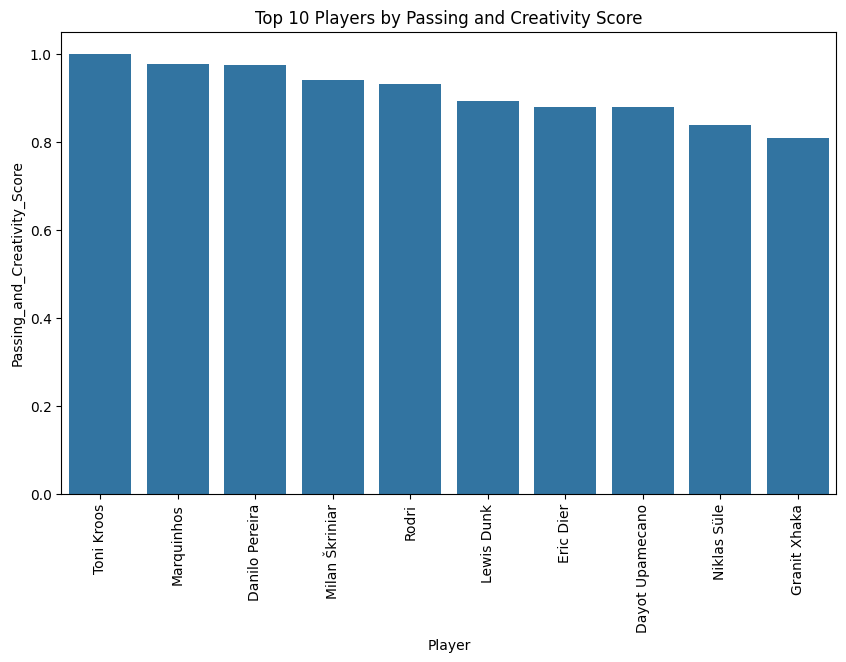

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of a bar plot
plt.figure(figsize=(10, 6))
top_players = data_2024.nlargest(10, 'Passing_and_Creativity_Score')
sns.barplot(x=top_players['Player'], y=top_players['Passing_and_Creativity_Score'])
plt.xticks(rotation=90)
plt.title('Top 10 Players by Passing and Creativity Score')
plt.show()



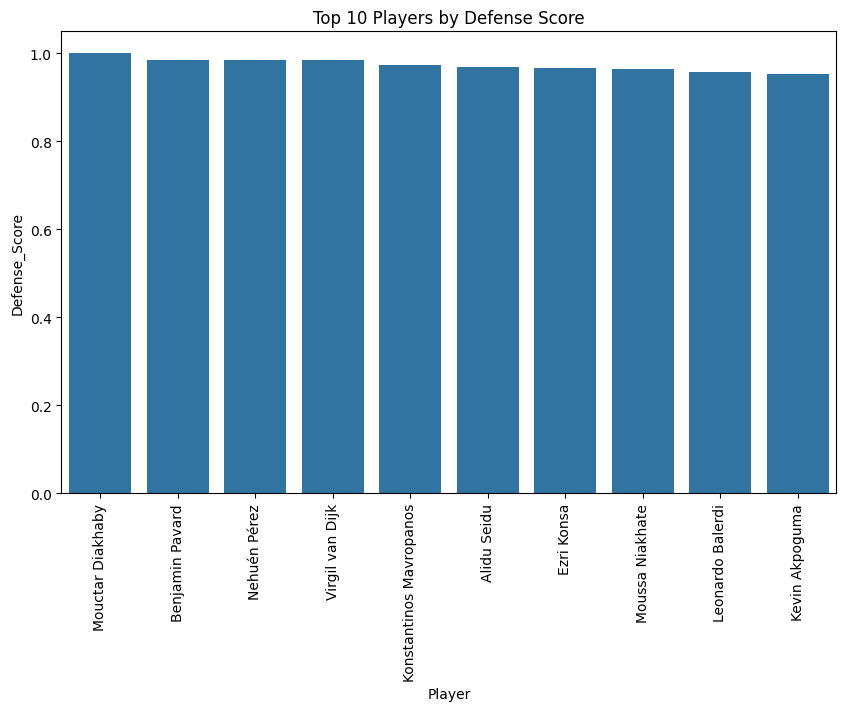

In [131]:
# Example of a bar plot
plt.figure(figsize=(10, 6))
top_players = data_2024.nlargest(10, 'Defense_Score')
sns.barplot(x=top_players['Player'], y=top_players['Defense_Score'])
plt.xticks(rotation=90)
plt.title('Top 10 Players by Defense Score')
plt.show()

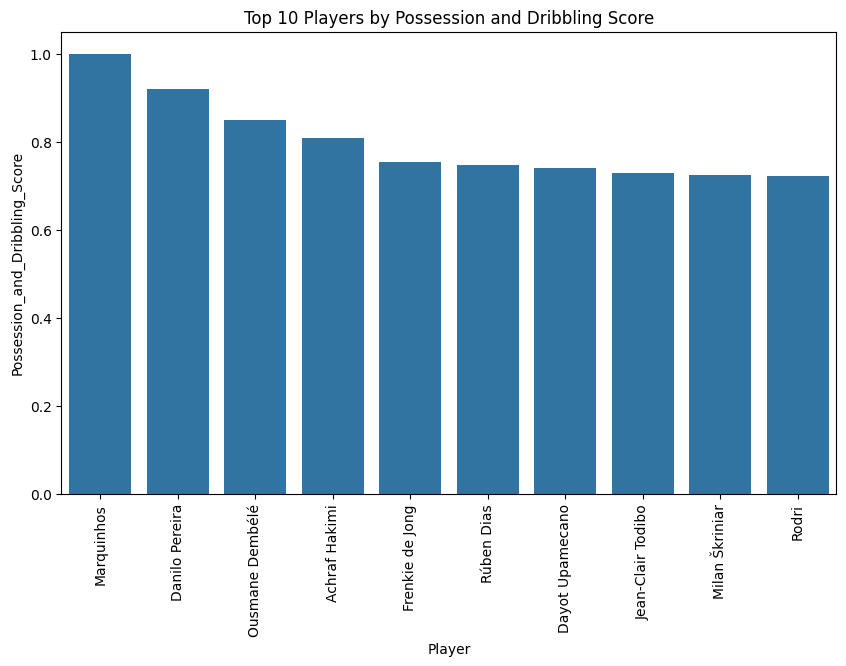

In [132]:
# Example of a bar plot
plt.figure(figsize=(10, 6))
top_players = data_2024.nlargest(10, 'Possession_and_Dribbling_Score')
sns.barplot(x=top_players['Player'], y=top_players['Possession_and_Dribbling_Score'])
plt.xticks(rotation=90)
plt.title('Top 10 Players by Possession and Dribbling Score')
plt.show()

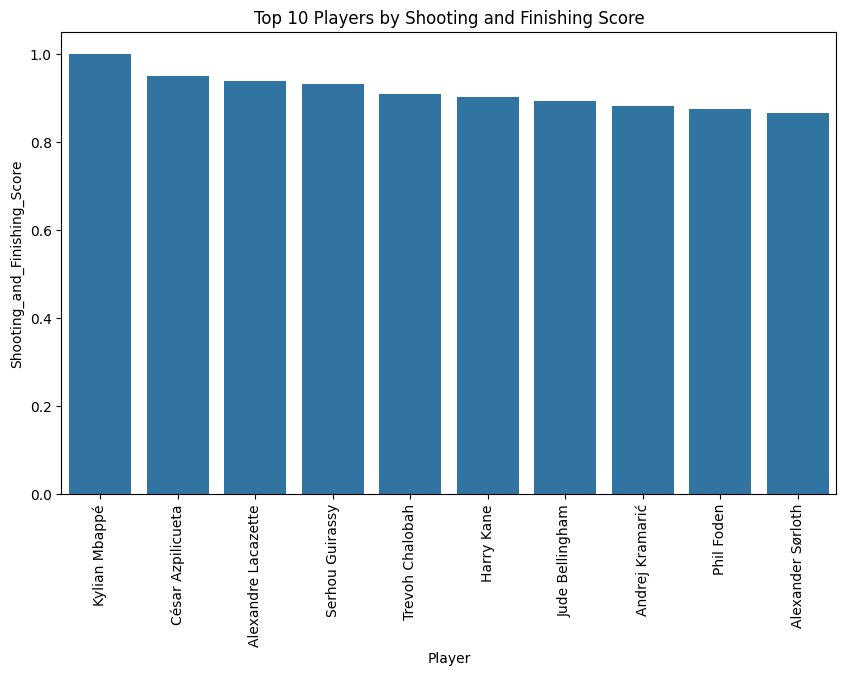

In [133]:
# Example of a bar plot
plt.figure(figsize=(10, 6))
top_players = data_2024.nlargest(10, 'Shooting_and_Finishing_Score')
sns.barplot(x=top_players['Player'], y=top_players['Shooting_and_Finishing_Score'])
plt.xticks(rotation=90)
plt.title('Top 10 Players by Shooting and Finishing Score')
plt.show()

In [134]:

# Add the 'Year' column to each dataset
data_2022['Year'] = 2022
data_2023['Year'] = 2023
data_2024['Year'] = 2024

# Combine the datasets
combined_data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

<ipython-input-134-8618981c2b7b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2022['Year'] = 2022
<ipython-input-134-8618981c2b7b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2023['Year'] = 2023
<ipython-input-134-8618981c2b7b>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_

In [135]:
data_2024.isna().sum()

,0
Unnamed: 0,0
Player,0
Nation,0
Pos,0
Squad,0
Comp,0
Age,0
Born,0
90s,0
MP,0


In [136]:
data_2023.isna().sum()

,0
Unnamed: 0,0
Player,0
Nation,0
Pos,0
Squad,0
Comp,0
Age,0
Born,0
90s,0
MP,0


In [137]:
data_2022.isna().sum()

,0
Unnamed: 0,0
Player,0
Nation,0
Pos,0
Squad,0
Comp,0
Age,0
Born,0
90s,0
MP,0


In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant feature lists for each aspect
passing_and_creativity_stats = [
    'Shot_Creating_Action_per90', 'Goal_Creating_Action_90', 'Pass_Live_Shot_per90',
    'Pass_Dead_Shot_per90', 'Take_Ons_Shot_per90', 'Shot-Shot_per90',
    'Fouls_drawn_Shot_per90', 'Defensive_Shot_per90', 'Pass_Live_Goal_per90',
    'Pass_Dead_Goal_per90', 'Take_Ons_Goal_per90', 'Shot_Goal_per90',
    'Fouls_Drawn_Goal_per90', 'Defensive_Goal_per90',
    'Passes_Total_Cmp_per90', 'Passes_Total_Att_per90', 'Passes_TotDist_per90',
    'Passes_PrgDist_per90', 'Passes_Short_Cmp_per90', 'Passes_Short_Att_per90',
    'Passes_Medium_Cmp_per90', 'Passes_Medium_Att_per90', 'Passes_Long_Cmp_per90',
    'Passes_Long_Att_per90', 'Passes_1/3_per90', 'Passes_Penalty_Area_per90',
    'Crosses_Penalty_Area_per90', 'Progressive_Passes_per90',
    'Live_Ball_Passes_per90', 'Dead_Ball_Passes_per90', 'Free_Kick_Passes_per90',
    'Switches_per90', 'Crosses_per90', 'Throw_Ins_Taken_per90',
    'Corner_Kicks_per90', 'In_Corner_Kicks_per90', 'Out_Corner_Kicks_per90',
    'Str_Corner_Kicks_per90', 'Passes_Cmp_per90', 'Passes_Offside_per90',
    'Passes_Blocked_Off_per90', 'Prg_Passes_per90'
]

defense_stats = [
    'Tackles_per90', 'Tackles_Def_3rd_per90',
    'Tackles_Mid_3rd_per90', 'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90',
    'Dribblers_Challenged_per90', 'Blocks_per90',
    'Shots_Blocked_per90', 'Passes_Blocked_Def_per90', 'Interceptions_per90',
    'Clearances_per90', 'Errors_Shots_per90',
    'Defensive_Shot_per90', 'Defensive_Goal_per90', 'Yellow_per90', 'Red_per90'
]

possession_and_dribbling_stats = [
    'Prg_Carries_per90', 'Prg_Passes_Received_per90',
    'Touches_per90', 'Touches_Def_Pen_per90', 'Touches_Def_3rd_per90', 'Touches_Mid_3rd_per90',
    'Touches_Att_3rd_per90', 'Touches_Att_Pen_per90', 'Tocuhes_Live_Balls_per90',
    'Take_Ons_Attempted_per90', 'Tackled_Take_Ons_per90', 'Carries_per90',
    'Total_Distance_per90', 'Progressive_Distance_Carried_per90',
    '1/3_Carries_per90', 'Carries_Penalty_Area_per90', 'Miscontrols_per90', 'Dispossessed_per90'
]

shooting_and_finishing_stats = [
    'Shots_total_per90', 'Shots_on_target_per90', 'Average_shot_distance',
    'Shots_free_kicks', 'Pens_Attempted'
]

# Combine all style metrics
style_metrics = passing_and_creativity_stats + defense_stats + possession_and_dribbling_stats + shooting_and_finishing_stats

In [139]:
# Split the combined dataset by position
defenders = combined_data[combined_data['Main_Pos'].str.contains('DF')]
midfielders = combined_data[combined_data['Main_Pos'].str.contains('MF')]
forwards = combined_data[combined_data['Main_Pos'].str.contains('FW')]

In [140]:
# Function to apply K-Means clustering and return the cluster averages
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']])
    data['kmeans_cluster'] = clusters
    cluster_averages = data.groupby('kmeans_cluster')[['Passing_and_Creativity_Score', 'Defense_Score', 'Possession_and_Dribbling_Score', 'Shooting_and_Finishing_Score']].mean()
    return data, cluster_averages

# Apply K-Means clustering for each position
defenders_clustered, defenders_cluster_averages = apply_kmeans(defenders, n_clusters=4)
midfielders_clustered, midfielders_cluster_averages = apply_kmeans(midfielders, n_clusters=4)
forwards_clustered, forwards_cluster_averages = apply_kmeans(forwards, n_clusters=4)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-140-4eadb8f74d6f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['kmeans_cluster'] = clusters
<ipython-input-140-4eadb8f74d6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kmeans_cluster'] = clusters
/usr/local/lib/pyth

In [141]:
print("\nMidfielders Cluster Averages:")
midfielders_cluster_averages


Midfielders Cluster Averages:


,Passing_and_Creativity_Score,Defense_Score,Possession_and_Dribbling_Score,Shooting_and_Finishing_Score
kmeans_cluster,,,,
0,0.384597,0.597429,0.366038,0.326131
1,0.329509,0.427581,0.381887,0.584834
2,0.220109,0.529338,0.220834,0.394413
3,0.562443,0.541060,0.593102,0.451201


In [142]:
# Display the cluster averages for each position
print("Defenders Cluster Averages:")
defenders_cluster_averages


Defenders Cluster Averages:


,Passing_and_Creativity_Score,Defense_Score,Possession_and_Dribbling_Score,Shooting_and_Finishing_Score
kmeans_cluster,,,,
0,0.705296,0.678522,0.685330,0.324834
1,0.335333,0.702771,0.251732,0.247299
2,0.506902,0.726418,0.448801,0.286158
3,0.397642,0.625637,0.371762,0.508147


In [143]:
print("\nForwards Cluster Averages:")
forwards_cluster_averages



Forwards Cluster Averages:


,Passing_and_Creativity_Score,Defense_Score,Possession_and_Dribbling_Score,Shooting_and_Finishing_Score
kmeans_cluster,,,,
0,0.119445,0.514846,0.210060,0.502545
1,0.080651,0.264397,0.155713,0.444475
2,0.106524,0.273596,0.181884,0.723758
3,0.221761,0.419692,0.460035,0.517466


In [144]:
# Define descriptive labels for each cluster based on averages
def describe_defender_clusters(cluster_id):
    if cluster_id == 0:
        return "Playmaking Defender"
    elif cluster_id == 1:
        return "Traditional Center-Back"
    elif cluster_id == 2:
        return "Balanced Defender"
    elif cluster_id == 3:
        return "Attacking Full-Back"

def describe_midfielder_clusters(cluster_id):
    if cluster_id == 0:
        return "Defensive Midfielder"
    elif cluster_id == 1:
        return "Attacking Midfielder"
    elif cluster_id == 2:
        return "Holding Midfielder"
    elif cluster_id == 3:
        return "Box-to-Box Midfielder"

def describe_forward_clusters(cluster_id):
    if cluster_id == 0:
        return "All-Round Forward"
    elif cluster_id == 1:
        return "Support Forward"
    elif cluster_id == 2:
        return "Poacher"
    elif cluster_id == 3:
        return "Creative Forward"




In [145]:
# Apply descriptive labels to each clustered data
defenders_clustered['Descriptive_Cluster_Label'] = defenders_clustered['kmeans_cluster'].apply(describe_defender_clusters)
midfielders_clustered['Descriptive_Cluster_Label'] = midfielders_clustered['kmeans_cluster'].apply(describe_midfielder_clusters)
forwards_clustered['Descriptive_Cluster_Label'] = forwards_clustered['kmeans_cluster'].apply(describe_forward_clusters)


<ipython-input-145-f61e617ec3aa>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  defenders_clustered['Descriptive_Cluster_Label'] = defenders_clustered['kmeans_cluster'].apply(describe_defender_clusters)
<ipython-input-145-f61e617ec3aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_clustered['Descriptive_Cluster_Label'] = defenders_clustered['kmeans_cluster'].apply(describe_defender_clusters)
<ipython-input-145-f61e617ec3aa>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [146]:
# Print the descriptive labels for verification
midfielders_clustered[['Player', 'Pos', 'Year','Descriptive_Cluster_Label']].head()


,Player,Pos,Year,Descriptive_Cluster_Label
2,Abdoulaye Doucouré,MF,2022,Holding Midfielder
8,Adrien Rabiot,MF,2022,Defensive Midfielder
9,Adrien Tameze,"MF,DF",2022,Attacking Midfielder
10,Adrien Thomasson,MF,2022,Attacking Midfielder
13,Alassane Pléa,"MF,FW",2022,Attacking Midfielder


In [147]:
forwards_clustered[['Player', 'Pos', 'Year', 'Descriptive_Cluster_Label']].head()

,Player,Pos,Year,Descriptive_Cluster_Label
6,Ademola Lookman,"FW,MF",2022,Creative Forward
7,Adri Embarba,"FW,MF",2022,Creative Forward
16,Aleksandr Golovin,"FW,MF",2022,Creative Forward
21,Alexander Isak,FW,2022,Support Forward
22,Alexander Sørloth,FW,2022,All-Round Forward


In [148]:
# Combine all clusters
combined_clustered = pd.concat([defenders_clustered, midfielders_clustered, forwards_clustered])

In [149]:
combined_clustered[combined_clustered['Player']=='İlkay Gündoğan'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
693,İlkay Gündoğan,2022,3,Box-to-Box Midfielder
1387,İlkay Gündoğan,2023,1,Attacking Midfielder
2081,İlkay Gündoğan,2024,3,Box-to-Box Midfielder


In [150]:
combined_clustered[combined_clustered['Player']=='Robert Lewandowski'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
569,Robert Lewandowski,2022,2,Poacher
1263,Robert Lewandowski,2023,0,All-Round Forward
1957,Robert Lewandowski,2024,2,Poacher


In [151]:
combined_clustered[combined_clustered['Player']=='Rafael Leão'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
549,Rafael Leão,2022,3,Creative Forward
1243,Rafael Leão,2023,3,Creative Forward
1937,Rafael Leão,2024,3,Creative Forward


In [152]:
combined_clustered[combined_clustered['Player']=='Theo Hernández'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
623,Theo Hernández,2022,0,Playmaking Defender
1317,Theo Hernández,2023,3,Attacking Full-Back
2011,Theo Hernández,2024,3,Attacking Full-Back


In [153]:
combined_clustered[combined_clustered['Player']=='Harry Kane'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
246,Harry Kane,2022,0,All-Round Forward
940,Harry Kane,2023,2,Poacher
1634,Harry Kane,2024,2,Poacher


In [154]:
combined_clustered[combined_clustered['Player'] == 'Achraf Hakimi'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
3,Achraf Hakimi,2022,3,Attacking Full-Back
697,Achraf Hakimi,2023,3,Attacking Full-Back
1391,Achraf Hakimi,2024,0,Playmaking Defender


In [155]:
combined_clustered[combined_clustered['Player']=='Bernardo Silva'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
85,Bernardo Silva,2022,3,Box-to-Box Midfielder
779,Bernardo Silva,2023,3,Box-to-Box Midfielder
1473,Bernardo Silva,2024,3,Box-to-Box Midfielder


In [156]:
combined_clustered[combined_clustered['Player']=='Kylian Mbappé'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
365,Kylian Mbappé,2022,3,Creative Forward
1059,Kylian Mbappé,2023,3,Creative Forward
1753,Kylian Mbappé,2024,2,Poacher


In [157]:
combined_clustered[combined_clustered['Player']=='Virgil van Dijk'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
650,Virgil van Dijk,2022,0,Playmaking Defender
1344,Virgil van Dijk,2023,0,Playmaking Defender
2038,Virgil van Dijk,2024,0,Playmaking Defender


In [158]:
combined_clustered[combined_clustered['Player']=='Erling Haaland'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
185,Erling Haaland,2022,2,Poacher
879,Erling Haaland,2023,2,Poacher
1573,Erling Haaland,2024,0,All-Round Forward


In [159]:
combined_clustered[combined_clustered['Player']=='Trent Alexander-Arnold'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
637,Trent Alexander-Arnold,2022,0,Playmaking Defender
1331,Trent Alexander-Arnold,2023,0,Playmaking Defender
2025,Trent Alexander-Arnold,2024,0,Playmaking Defender


In [160]:
combined_clustered[combined_clustered['Player']=='Victor Osimhen'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
647,Victor Osimhen,2022,1,Support Forward
1341,Victor Osimhen,2023,2,Poacher
2035,Victor Osimhen,2024,0,All-Round Forward


In [161]:
combined_clustered[combined_clustered['Player']=='Alessandro Bastoni'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
17,Alessandro Bastoni,2022,0,Playmaking Defender
711,Alessandro Bastoni,2023,0,Playmaking Defender
1405,Alessandro Bastoni,2024,0,Playmaking Defender


In [162]:
combined_clustered[combined_clustered['Player']=='Lautaro Martínez'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
369,Lautaro Martínez,2022,0,All-Round Forward
1063,Lautaro Martínez,2023,2,Poacher
1757,Lautaro Martínez,2024,2,Poacher


In [163]:
combined_clustered[combined_clustered['Player']=='Jude Bellingham'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
338,Jude Bellingham,2022,0,Defensive Midfielder
1032,Jude Bellingham,2023,3,Box-to-Box Midfielder
1726,Jude Bellingham,2024,1,Attacking Midfielder


In [164]:
combined_clustered[combined_clustered['Player']=='Hakan Çalhanoğlu'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
243,Hakan Çalhanoğlu,2022,3,Box-to-Box Midfielder
937,Hakan Çalhanoğlu,2023,1,Attacking Midfielder
1631,Hakan Çalhanoğlu,2024,3,Box-to-Box Midfielder


In [165]:
combined_clustered[combined_clustered['Player']=='Federico Dimarco'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
195,Federico Dimarco,2022,0,Playmaking Defender
889,Federico Dimarco,2023,3,Attacking Full-Back
1583,Federico Dimarco,2024,3,Attacking Full-Back


In [166]:
combined_clustered[combined_clustered['Player']=='Antoine Griezmann'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
50,Antoine Griezmann,2022,0,All-Round Forward
744,Antoine Griezmann,2023,3,Creative Forward
1438,Antoine Griezmann,2024,2,Poacher


In [167]:
combined_clustered[combined_clustered['Player']=='Joško Gvardiol'][['Player', 'Year', 'kmeans_cluster', 'Descriptive_Cluster_Label']]

,Player,Year,kmeans_cluster,Descriptive_Cluster_Label
334,Joško Gvardiol,2022,0,Playmaking Defender
1028,Joško Gvardiol,2023,0,Playmaking Defender
1722,Joško Gvardiol,2024,3,Attacking Full-Back


In [168]:
# Add the overall_score column
combined_clustered['overall_score'] = (combined_clustered['Passing_and_Creativity_Score'] +
                                       combined_clustered['Defense_Score'] +
                                       combined_clustered['Possession_and_Dribbling_Score'] +
                                       combined_clustered['Shooting_and_Finishing_Score']) / 4

# Filter for the year 2024
combined_clustered_2024 = combined_clustered[combined_clustered['Year'] == 2024]


# Function to select the top 3 players from each cluster within a position
def top_players_by_cluster_for_position(position_data):
    return position_data.groupby('kmeans_cluster').apply(lambda x: x.nlargest(3, 'overall_score')).reset_index(drop=True)

# Split data by positions
defenders_2024 = combined_clustered_2024[combined_clustered_2024['Main_Pos'].str.contains('DF')]
midfielders_2024 = combined_clustered_2024[combined_clustered_2024['Main_Pos'].str.contains('MF')]
forwards_2024 = combined_clustered_2024[combined_clustered_2024['Main_Pos'].str.contains('FW')]

# Get top players by cluster for each position
top_defenders_by_cluster = top_players_by_cluster_for_position(defenders_2024)
top_midfielders_by_cluster = top_players_by_cluster_for_position(midfielders_2024)
top_forwards_by_cluster = top_players_by_cluster_for_position(forwards_2024)

# Display the results
print("Top Defenders by Cluster:")
top_defenders_by_cluster[['Player','Year', 'kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]




Top Defenders by Cluster:


<ipython-input-168-deda3bd6622d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_clustered['overall_score'] = (combined_clustered['Passing_and_Creativity_Score'] +


,Player,Year,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Rúben Dias,2024,0,0.699489,Playmaking Defender
1,Marquinhos,2024,0,0.694675,Playmaking Defender
2,Eric Dier,2024,0,0.684431,Playmaking Defender
3,Mouctar Diakhaby,2024,1,0.523951,Traditional Center-Back
4,Jakub Kiwior,2024,1,0.485566,Traditional Center-Back
5,Aihen Muñoz,2024,1,0.484392,Traditional Center-Back
6,Castello Lukeba,2024,2,0.635833,Balanced Defender
7,Leonardo Balerdi,2024,2,0.609381,Balanced Defender
8,Alidu Seidu,2024,2,0.589119,Balanced Defender
9,Trevoh Chalobah,2024,3,0.649776,Attacking Full-Back


In [169]:
print("\nTop Midfielders by Cluster:")
top_midfielders_by_cluster[['Player', 'Year','kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]




Top Midfielders by Cluster:


,Player,Year,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Fabián Ruiz Peña,2024,0,0.514234,Defensive Midfielder
1,Oriol Romeu,2024,0,0.508791,Defensive Midfielder
2,Baptiste Santamaria,2024,0,0.508540,Defensive Midfielder
3,Jude Bellingham,2024,1,0.546223,Attacking Midfielder
4,Douglas Luiz,2024,1,0.510127,Attacking Midfielder
5,Laurent Abergel,2024,1,0.509314,Attacking Midfielder
6,Hugo Guillamón,2024,2,0.486308,Holding Midfielder
7,Amadou Haidara,2024,2,0.463740,Holding Midfielder
8,Adrien Rabiot,2024,2,0.462245,Holding Midfielder
9,Rodri,2024,3,0.713601,Box-to-Box Midfielder


In [170]:
print("\nTop Forwards by Cluster:")
top_forwards_by_cluster[['Player', 'kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]


Top Forwards by Cluster:


,Player,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Pablo Fornals,0,0.434646,All-Round Forward
1,Adri Embarba,0,0.412081,All-Round Forward
2,Diogo Jota,0,0.408282,All-Round Forward
3,Mathias Pereira Lage,1,0.313275,Support Forward
4,Iago Aspas,1,0.291143,Support Forward
5,Rafael Borré,1,0.284173,Support Forward
6,Kylian Mbappé,2,0.534289,Poacher
7,Son Heung-min,2,0.423715,Poacher
8,Antoine Griezmann,2,0.413564,Poacher
9,Phil Foden,3,0.513440,Creative Forward


<ipython-input-171-02a93632057b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=defenders, x='Descriptive_Cluster_Label', palette='Set2')


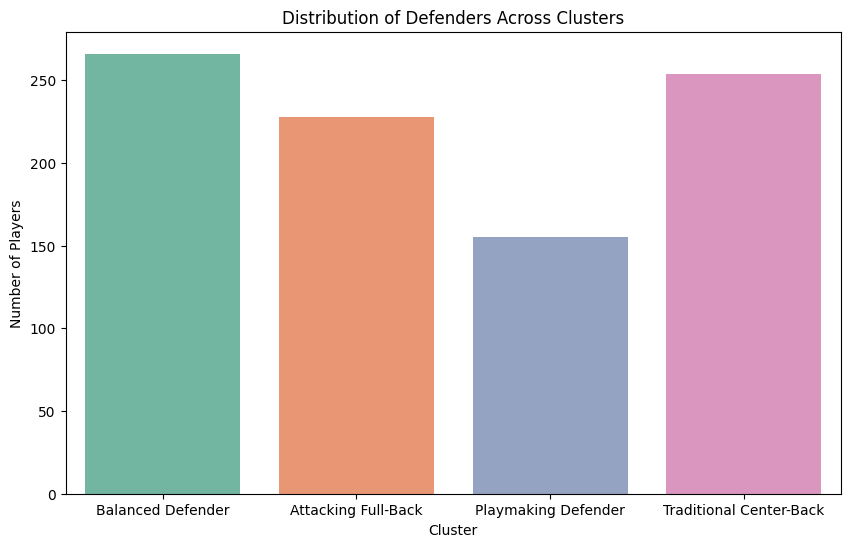

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_clustered' is your DataFrame and 'Descriptive_Cluster_Label' contains the cluster names

# Filter data for Defenders
defenders = combined_clustered[combined_clustered['Main_Pos'].str.contains('DF')]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=defenders, x='Descriptive_Cluster_Label', palette='Set2')
plt.title('Distribution of Defenders Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()


<ipython-input-172-1ef5c5d11dc6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=midfielders, x='Descriptive_Cluster_Label', palette='Set2')


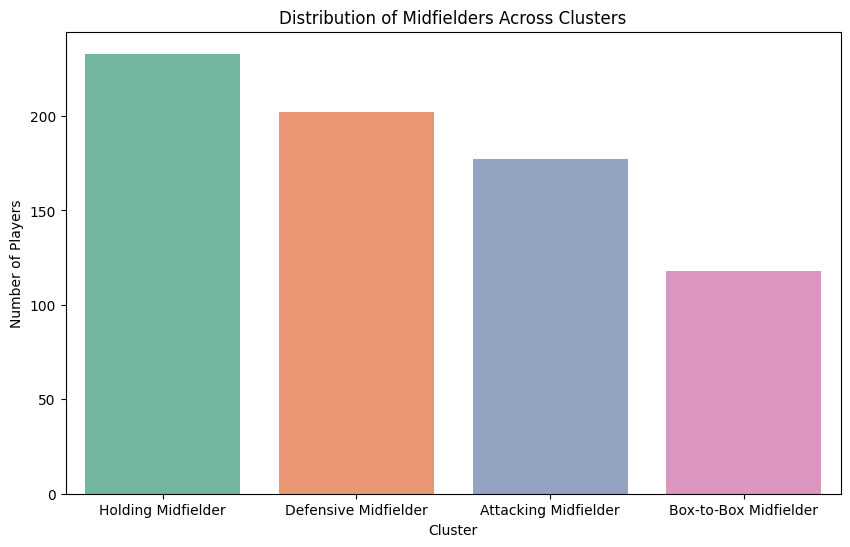

In [172]:
# Filter data for Midfielders
midfielders = combined_clustered[combined_clustered['Main_Pos'].str.contains('MF')]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=midfielders, x='Descriptive_Cluster_Label', palette='Set2')
plt.title('Distribution of Midfielders Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()


<ipython-input-173-3e9f4e129c85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forwards, x='Descriptive_Cluster_Label', palette='Set2')


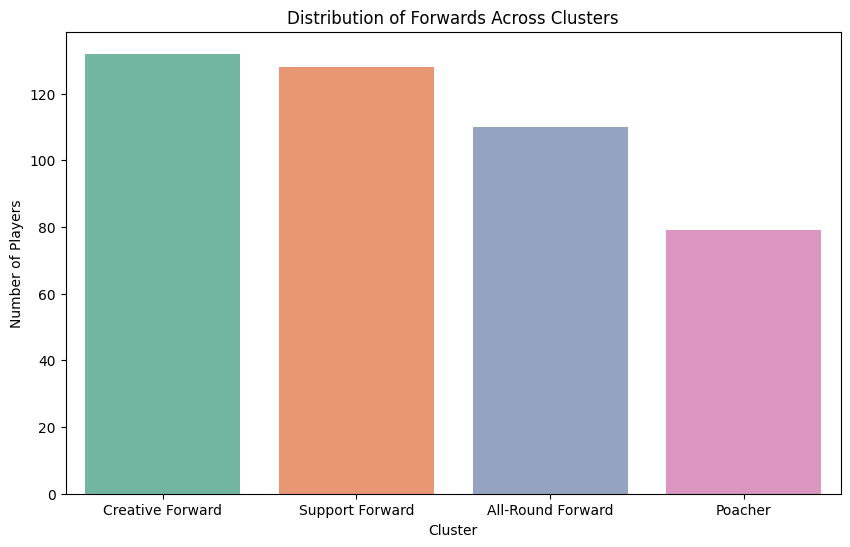

In [173]:
# Filter data for Forwards
forwards = combined_clustered[combined_clustered['Main_Pos'].str.contains('FW')]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=forwards, x='Descriptive_Cluster_Label', palette='Set2')
plt.title('Distribution of Forwards Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()


In [174]:
# List of well-known squads
top_squads = ['Inter', 'Manchester City', 'Real Madrid', 'Liverpool', 'Paris S-G',
              'Bayern Munich', 'Milan', 'Barcelona', 'Juventus', 'Manchester United', 'Arsenal']

# Filter the data for players from the top squads
filtered_combined_clustered_2024 = combined_clustered_2024[combined_clustered_2024['Squad'].isin(top_squads)]

# Function to select the top 3 players from each cluster within a position
def top_players_by_cluster_for_position(position_data):
    return position_data.groupby('kmeans_cluster').apply(lambda x: x.nlargest(3, 'overall_score')).reset_index(drop=True)

# Split data by positions
defenders_2024 = filtered_combined_clustered_2024[filtered_combined_clustered_2024['Main_Pos'].str.contains('DF')]
midfielders_2024 = filtered_combined_clustered_2024[filtered_combined_clustered_2024['Main_Pos'].str.contains('MF')]
forwards_2024 = filtered_combined_clustered_2024[filtered_combined_clustered_2024['Main_Pos'].str.contains('FW')]

# Get top players by cluster for each position
top_defenders_by_cluster = top_players_by_cluster_for_position(defenders_2024)
top_midfielders_by_cluster = top_players_by_cluster_for_position(midfielders_2024)
top_forwards_by_cluster = top_players_by_cluster_for_position(forwards_2024)

# Display the results
print("Top Defenders by Cluster:")
top_defenders_by_cluster[['Player', 'Squad', 'Year', 'kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]


Top Defenders by Cluster:


,Player,Squad,Year,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Rúben Dias,Manchester City,2024,0,0.699489,Playmaking Defender
1,Marquinhos,Paris S-G,2024,0,0.694675,Playmaking Defender
2,Eric Dier,Bayern Munich,2024,0,0.684431,Playmaking Defender
3,Jakub Kiwior,Arsenal,2024,1,0.485566,Traditional Center-Back
4,Stefan de Vrij,Inter,2024,1,0.440047,Traditional Center-Back
5,Andrea Cambiaso,Juventus,2024,1,0.417440,Traditional Center-Back
6,Benjamin Pavard,Inter,2024,2,0.585269,Balanced Defender
7,Francesco Acerbi,Inter,2024,2,0.580059,Balanced Defender
8,Oleksandr Zinchenko,Arsenal,2024,2,0.569740,Balanced Defender
9,Andrew Robertson,Liverpool,2024,3,0.601748,Attacking Full-Back


In [175]:

print("\nTop Midfielders by Cluster:")
top_midfielders_by_cluster[['Player', 'Squad', 'Year', 'kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]





Top Midfielders by Cluster:


,Player,Squad,Year,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Fabián Ruiz Peña,Paris S-G,2024,0,0.514234,Defensive Midfielder
1,Oriol Romeu,Barcelona,2024,0,0.508791,Defensive Midfielder
2,Alexis Mac Allister,Liverpool,2024,0,0.490198,Defensive Midfielder
3,Jude Bellingham,Real Madrid,2024,1,0.546223,Attacking Midfielder
4,Kevin De Bruyne,Manchester City,2024,1,0.486756,Attacking Midfielder
5,Dominik Szoboszlai,Liverpool,2024,1,0.436115,Attacking Midfielder
6,Adrien Rabiot,Juventus,2024,2,0.462245,Holding Midfielder
7,Yunus Musah,Milan,2024,2,0.410853,Holding Midfielder
8,Ruben Loftus-Cheek,Milan,2024,2,0.392514,Holding Midfielder
9,Rodri,Manchester City,2024,3,0.713601,Box-to-Box Midfielder


In [176]:
print("\nTop Forwards by Cluster:")
top_forwards_by_cluster[['Player', 'Squad', 'Year', 'kmeans_cluster', 'overall_score', 'Descriptive_Cluster_Label']]


Top Forwards by Cluster:


,Player,Squad,Year,kmeans_cluster,overall_score,Descriptive_Cluster_Label
0,Diogo Jota,Liverpool,2024,0,0.408282,All-Round Forward
1,Leandro Trossard,Arsenal,2024,0,0.391279,All-Round Forward
2,Erling Haaland,Manchester City,2024,0,0.358870,All-Round Forward
3,Gabriel Jesus,Arsenal,2024,1,0.280730,Support Forward
4,Marcus Thuram,Inter,2024,1,0.247509,Support Forward
5,Joselu,Real Madrid,2024,1,0.164997,Support Forward
6,Kylian Mbappé,Paris S-G,2024,2,0.534289,Poacher
7,Harry Kane,Bayern Munich,2024,2,0.372014,Poacher
8,Mohamed Salah,Liverpool,2024,2,0.366760,Poacher
9,Phil Foden,Manchester City,2024,3,0.513440,Creative Forward
